#### EHB 420E - ANN FINAL EXAM
CRN: 10342

Kayra Coşkun - 040200002

##### Dataset and Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Read the dataset from Excel file
coin_df = pd.read_excel('coin_toss_exp.xlsx', sheet_name='Sheet1', index_col='Number of toss')

coin_df.head()

,Max. Distance (cm),Dropping Condition,Did it spin?,Outcome
Number of toss,,,,
1,101,Tail up toss,No,Tail
2,102,Tail up toss,No,Head
3,102,Tail up toss,No,Tail
4,100,Tail up toss,No,Tail
5,101,Tail up toss,No,Tail


In [3]:
coin_df.shape

(340, 4)

In [4]:
# Datatypes of the columns
coin_df.dtypes

Max. Distance (cm)     int64
Dropping Condition    object
Did it spin?          object
Outcome               object
dtype: object

In [5]:
# Encode categorical variables with LabelEncoder

label_encoder_condition = LabelEncoder()
label_encoder_spin = LabelEncoder()
label_encoder_outcome = LabelEncoder()

coin_df['Dropping Condition'] = label_encoder_condition.fit_transform(coin_df['Dropping Condition'])
coin_df['Did it spin?'] = label_encoder_spin.fit_transform(coin_df['Did it spin?'])
coin_df['Outcome'] = label_encoder_outcome.fit_transform(coin_df['Outcome'])

coin_df.head(10)

,Max. Distance (cm),Dropping Condition,Did it spin?,Outcome
Number of toss,,,,
1,101,1,0,1
2,102,1,0,0
3,102,1,0,1
4,100,1,0,1
5,101,1,0,1
6,102,1,0,1
7,103,1,0,1
8,105,1,1,0
9,103,1,0,1


In [6]:
# Cheking the encoded values for Dropping Condition
coin_df['Dropping Condition'].value_counts()

1    85
3    85
2    85
0    85
Name: Dropping Condition, dtype: int64

In [7]:
# Normalize the columns with MinMaxScaler

scaler = MinMaxScaler()

coin_df['Max. Distance (cm)'] = scaler.fit_transform(coin_df[['Max. Distance (cm)']])

coin_df.head()

,Max. Distance (cm),Dropping Condition,Did it spin?,Outcome
Number of toss,,,,
1,0.125,1,0,1
2,0.250,1,0,0
3,0.250,1,0,1
4,0.000,1,0,1
5,0.125,1,0,1


In [8]:
# Create X and y variables

X = coin_df[['Max. Distance (cm)', 'Dropping Condition', 'Did it spin?']]
y = coin_df['Outcome']

In [9]:
X.head()

,Max. Distance (cm),Dropping Condition,Did it spin?
Number of toss,,,
1,0.125,1,0
2,0.250,1,0
3,0.250,1,0
4,0.000,1,0
5,0.125,1,0


In [10]:
y.head()

Number of toss
1    1
2    0
3    1
4    1
5    1
Name: Outcome, dtype: int32

In [11]:
# Split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((272, 3), (68, 3), (272,), (68,))

##### Model Creation

Epoch 1/80
109/109 [==============================] - 4s 10ms/step - loss: 0.6882 - accuracy: 0.5760 - val_loss: 0.6613 - val_accuracy: 0.7273
Epoch 2/80
109/109 [==============================] - 1s 5ms/step - loss: 0.6819 - accuracy: 0.6267 - val_loss: 0.6528 - val_accuracy: 0.7273
Epoch 3/80
109/109 [==============================] - 1s 9ms/step - loss: 0.6785 - accuracy: 0.6267 - val_loss: 0.6495 - val_accuracy: 0.7455
Epoch 4/80
109/109 [==============================] - 1s 9ms/step - loss: 0.6758 - accuracy: 0.6359 - val_loss: 0.6400 - val_accuracy: 0.7455
Epoch 5/80
109/109 [==============================] - 1s 8ms/step - loss: 0.6718 - accuracy: 0.6313 - val_loss: 0.6560 - val_accuracy: 0.6727
Epoch 6/80
109/109 [==============================] - 1s 8ms/step - loss: 0.6721 - accuracy: 0.5853 - val_loss: 0.6504 - val_accuracy: 0.6909
Epoch 7/80
109/109 [==============================] - 1s 5ms/step - loss: 0.6694 - accuracy: 0.6544 - val_loss: 0.6458 - val_accuracy: 0.6909
Epoch

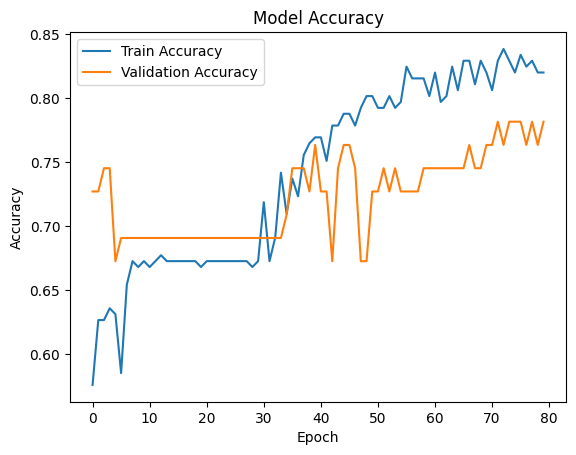

In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=80, batch_size=2, verbose=1, validation_split=0.2)

# Plotting the accuracy history to find the best epoch number
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


##### Prediction and Metrics

In [13]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

3/3 [==============================] - 0s 7ms/step


In [14]:
from sklearn.metrics import confusion_matrix

# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_nn)

tn, fp, fn, tp = conf_matrix.ravel()

confusion_matrix_table = pd.DataFrame(
    [[tp, fp],
     [fn, tn]],
    columns=["Predicted Positive", "Predicted Negative"],
    index=["Actual Positive", "Actual Negative"]
)

confusion_matrix_table

,Predicted Positive,Predicted Negative
Actual Positive,29,9
Actual Negative,3,27


In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [19]:
# Model performance with different metrics (accuracy, recall, precision, f1 score)

accuracy = accuracy_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

print(
    f""" 
    Neural Network Model Performance
    ---------------------------------
    Accuracy: {accuracy.round(3)}
    Recall: {recall.round(3)}
    Precision: {precision.round(3)}
    F1 Score: {f1.round(3)}
    """
)

 
    Neural Network Model Performance
    ---------------------------------
    Accuracy: 0.824
    Recall: 0.906
    Precision: 0.763
    F1 Score: 0.829
    


3/3 [==============================] - 0s 4ms/step


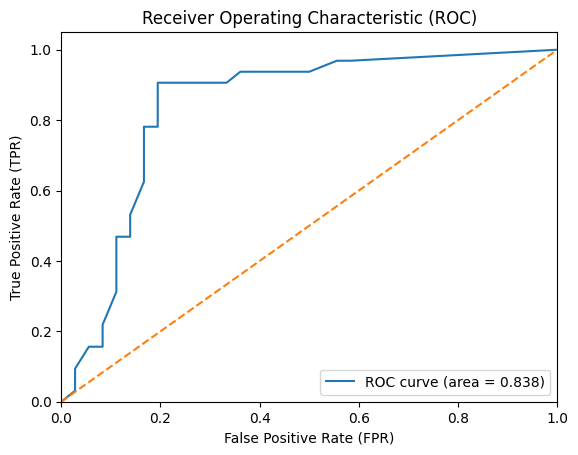

In [24]:
from sklearn.metrics import roc_curve, auc

# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc.round(3)})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()